In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install rasterio
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 51.1 MB/s eta 0:00:00


In [ ]:
# import files, cleaning the files, merge the files
# 定义存储文件的目录
import os
import pandas as pd

# 获取文件路径列表
file_list = ["/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_2_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_3_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_4_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_5_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_6_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_7_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_8_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/OD_time_distance_instruction_2000_1.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_2000_2_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_2000_3_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_2000_4_processed.csv",
             "/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/chunk_2000_5_processed.csv"]

# 读取并合并文件
dataframes = [pd.read_csv(file) for file in file_list]
merged_df = pd.concat(dataframes, ignore_index=True)

# 查看合并后的数据
merged_df


,origin_id,destination_id,distance_meters,population_weight,origin_loc,destination_loc,walking_distance,walking_duration,walking_instructions
0,23366,7917,2908.550159,1,POINT (31.234871586477823 121.4598620928743),POINT (31.248256451826972 121.48214214406875),3022.0,40.300000,沿新闸路向东北步行876米左转 -> 沿乌镇路向北步行448米右转 -> 向东北步行257米...
1,23366,8103,994.562853,1,POINT (31.234871586477823 121.4598620928743),POINT (31.225910961002086 121.46364978111635),1197.0,15.966667,向东步行37米右转 -> 沿石门二路辅路向东南步行249米向左前方行走 -> 沿石门二路步行...
2,23366,15321,2654.862695,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22496410253977 121.43880913080065),2331.0,31.083333,沿新闸路向西南步行2159米右转 -> 沿万航渡路向西步行119米左转 -> 向南步行53米...
3,23367,32,2692.516726,1,POINT (31.234871586477823 121.46076040815845),POINT (31.24568500093139 121.48221228970229),2847.0,37.966667,向西南步行6米右转 -> 沿石门二路步行96米向右前方行走 -> 沿新闸路向东北步行789米...
4,23367,56,636.286360,1,POINT (31.234871586477823 121.46076040815845),POINT (31.23404893186907 121.46856854803025),1058.0,14.100000,沿石门二路向南步行239米左转 -> 沿北京西路向东步行685米右转 -> 沿新昌路步行13...
...,...,...,...,...,...,...,...,...,...
71322,23366,5234,1946.850434,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22054466419129 121.46640111292464),2268.0,30.233333,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
71323,23366,5651,2919.650191,1,POINT (31.234871586477823 121.4598620928743),POINT (31.218529661236683 121.44155435756056),2884.0,38.450000,沿新闸路向西南步行265米左转 -> 沿泰兴路向南步行270米右转 -> 沿北京西路向西南步...
71324,23366,6037,1795.776417,1,POINT (31.234871586477823 121.4598620928743),POINT (31.224994962160345 121.47302302161059),2053.0,27.366667,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
71325,23366,6435,882.983523,1,POINT (31.234871586477823 121.4598620928743),POINT (31.235872944920363 121.46913939765386),1103.0,14.700000,向东步行37米右转 -> 沿石门二路辅路向南步行242米左转 -> 沿北京西路步行813米左...


In [ ]:
merged_df_cleaned = merged_df[merged_df["walking_distance"].notna()]
merged_df_cleaned

,origin_id,destination_id,distance_meters,population_weight,origin_loc,destination_loc,walking_distance,walking_duration,walking_instructions
0,23366,7917,2908.550159,1,POINT (31.234871586477823 121.4598620928743),POINT (31.248256451826972 121.48214214406875),3022.0,40.300000,沿新闸路向东北步行876米左转 -> 沿乌镇路向北步行448米右转 -> 向东北步行257米...
1,23366,8103,994.562853,1,POINT (31.234871586477823 121.4598620928743),POINT (31.225910961002086 121.46364978111635),1197.0,15.966667,向东步行37米右转 -> 沿石门二路辅路向东南步行249米向左前方行走 -> 沿石门二路步行...
2,23366,15321,2654.862695,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22496410253977 121.43880913080065),2331.0,31.083333,沿新闸路向西南步行2159米右转 -> 沿万航渡路向西步行119米左转 -> 向南步行53米...
3,23367,32,2692.516726,1,POINT (31.234871586477823 121.46076040815845),POINT (31.24568500093139 121.48221228970229),2847.0,37.966667,向西南步行6米右转 -> 沿石门二路步行96米向右前方行走 -> 沿新闸路向东北步行789米...
4,23367,56,636.286360,1,POINT (31.234871586477823 121.46076040815845),POINT (31.23404893186907 121.46856854803025),1058.0,14.100000,沿石门二路向南步行239米左转 -> 沿北京西路向东步行685米右转 -> 沿新昌路步行13...
...,...,...,...,...,...,...,...,...,...
71322,23366,5234,1946.850434,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22054466419129 121.46640111292464),2268.0,30.233333,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
71323,23366,5651,2919.650191,1,POINT (31.234871586477823 121.4598620928743),POINT (31.218529661236683 121.44155435756056),2884.0,38.450000,沿新闸路向西南步行265米左转 -> 沿泰兴路向南步行270米右转 -> 沿北京西路向西南步...
71324,23366,6037,1795.776417,1,POINT (31.234871586477823 121.4598620928743),POINT (31.224994962160345 121.47302302161059),2053.0,27.366667,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
71325,23366,6435,882.983523,1,POINT (31.234871586477823 121.4598620928743),POINT (31.235872944920363 121.46913939765386),1103.0,14.700000,向东步行37米右转 -> 沿石门二路辅路向南步行242米左转 -> 沿北京西路步行813米左...


In [ ]:
merged_df_cleaned = merged_df[merged_df["walking_distance"]< 3000]
merged_df_cleaned

,origin_id,destination_id,distance_meters,population_weight,origin_loc,destination_loc,walking_distance,walking_duration,walking_instructions
1,23366,8103,994.562853,1,POINT (31.234871586477823 121.4598620928743),POINT (31.225910961002086 121.46364978111635),1197.0,15.966667,向东步行37米右转 -> 沿石门二路辅路向东南步行249米向左前方行走 -> 沿石门二路步行...
2,23366,15321,2654.862695,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22496410253977 121.43880913080065),2331.0,31.083333,沿新闸路向西南步行2159米右转 -> 沿万航渡路向西步行119米左转 -> 向南步行53米...
3,23367,32,2692.516726,1,POINT (31.234871586477823 121.46076040815845),POINT (31.24568500093139 121.48221228970229),2847.0,37.966667,向西南步行6米右转 -> 沿石门二路步行96米向右前方行走 -> 沿新闸路向东北步行789米...
4,23367,56,636.286360,1,POINT (31.234871586477823 121.46076040815845),POINT (31.23404893186907 121.46856854803025),1058.0,14.100000,沿石门二路向南步行239米左转 -> 沿北京西路向东步行685米右转 -> 沿新昌路步行13...
5,23367,57,1883.073903,1,POINT (31.234871586477823 121.46076040815845),POINT (31.218958730579963 121.4644941435671),1893.0,25.233333,沿石门二路向南步行248米向右前方行走 -> 沿石门二路向南步行214米直行 -> 沿石门一...
...,...,...,...,...,...,...,...,...,...
71322,23366,5234,1946.850434,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22054466419129 121.46640111292464),2268.0,30.233333,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
71323,23366,5651,2919.650191,1,POINT (31.234871586477823 121.4598620928743),POINT (31.218529661236683 121.44155435756056),2884.0,38.450000,沿新闸路向西南步行265米左转 -> 沿泰兴路向南步行270米右转 -> 沿北京西路向西南步...
71324,23366,6037,1795.776417,1,POINT (31.234871586477823 121.4598620928743),POINT (31.224994962160345 121.47302302161059),2053.0,27.366667,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
71325,23366,6435,882.983523,1,POINT (31.234871586477823 121.4598620928743),POINT (31.235872944920363 121.46913939765386),1103.0,14.700000,向东步行37米右转 -> 沿石门二路辅路向南步行242米左转 -> 沿北京西路步行813米左...


In [ ]:
merged_df_cleaned.to_csv("/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/ALL_Valid_OD_Instructions", index=False)

In [ ]:
merged_df_nah = merged_df[merged_df["walking_distance"].isna()]
merged_df_nah

,origin_id,destination_id,distance_meters,population_weight,origin_loc,destination_loc,walking_distance,walking_duration,walking_instructions
10003,25214,3132,2158.059264,1,POINT (31.228583379488988 121.42572611207778),POINT (31.22019587593535 121.40873807146109),NaN,NaN,NaN
10004,25214,3162,2372.306363,1,POINT (31.228583379488988 121.42572611207778),POINT (31.219556787694955 121.40673966693564),NaN,NaN,NaN
10005,25214,3163,2247.079580,1,POINT (31.228583379488988 121.42572611207778),POINT (31.220039904751385 121.40742593454043),NaN,NaN,NaN
10006,25214,3177,2102.435492,1,POINT (31.228583379488988 121.42572611207778),POINT (31.221853411472114 121.40775652098571),NaN,NaN,NaN
10007,25214,3246,2054.685712,1,POINT (31.228583379488988 121.42572611207778),POINT (31.220795284572777 121.40909927546268),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
63308,21472,170,847.286616,1,POINT (31.241159793466664 121.45806546230608),POINT (31.242803543365604 121.44992703411208),NaN,NaN,NaN
63312,21472,222,2667.420945,1,POINT (31.241159793466664 121.45806546230608),POINT (31.25950593097475 121.44694433930889),NaN,NaN,NaN
63316,21472,509,1861.356492,1,POINT (31.241159793466664 121.45806546230608),POINT (31.237296763779494 121.47522825085326),NaN,NaN,NaN
63320,21472,1372,2441.212504,1,POINT (31.241159793466664 121.45806546230608),POINT (31.231951187349384 121.47826151864554),NaN,NaN,NaN


In [ ]:
merged_df_nah.to_csv("/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/ALL_NaN_OD_Instructions", index=False)

In [4]:
import pandas as pd
merged_df = pd.read_csv("/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/ALL_Valid_OD_Instructions")
print(merged_df.describe())
merged_df

          origin_id  destination_id  distance_meters  population_weight  \
count  22671.000000    22671.000000     22671.000000            22671.0   
mean   25409.448017     3193.373032      1888.157089                1.0   
std     3546.309617     3401.296900       654.091723                0.0   
min    19642.000000       32.000000         0.000000                1.0   
25%    23076.000000      356.000000      1455.932362                1.0   
50%    24411.000000     1948.000000      1986.883171                1.0   
75%    26841.000000     5233.000000      2406.043050                1.0   
max    36636.000000    15321.000000      2999.304148                1.0   

       walking_distance  walking_duration  
count      22671.000000      22671.000000  
mean        2118.365489         28.244911  
std          636.754498          8.490035  
min            4.000000          0.050000  
25%         1704.000000         22.716667  
50%         2238.000000         29.833333  
75%         2641

,origin_id,destination_id,distance_meters,population_weight,origin_loc,destination_loc,walking_distance,walking_duration,walking_instructions
0,23366,8103,994.562853,1,POINT (31.234871586477823 121.4598620928743),POINT (31.225910961002086 121.46364978111635),1197.0,15.966667,向东步行37米右转 -> 沿石门二路辅路向东南步行249米向左前方行走 -> 沿石门二路步行...
1,23366,15321,2654.862695,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22496410253977 121.43880913080065),2331.0,31.083333,沿新闸路向西南步行2159米右转 -> 沿万航渡路向西步行119米左转 -> 向南步行53米...
2,23367,32,2692.516726,1,POINT (31.234871586477823 121.46076040815845),POINT (31.24568500093139 121.48221228970229),2847.0,37.966667,向西南步行6米右转 -> 沿石门二路步行96米向右前方行走 -> 沿新闸路向东北步行789米...
3,23367,56,636.286360,1,POINT (31.234871586477823 121.46076040815845),POINT (31.23404893186907 121.46856854803025),1058.0,14.100000,沿石门二路向南步行239米左转 -> 沿北京西路向东步行685米右转 -> 沿新昌路步行13...
4,23367,57,1883.073903,1,POINT (31.234871586477823 121.46076040815845),POINT (31.218958730579963 121.4644941435671),1893.0,25.233333,沿石门二路向南步行248米向右前方行走 -> 沿石门二路向南步行214米直行 -> 沿石门一...
...,...,...,...,...,...,...,...,...,...
22666,23366,5234,1946.850434,1,POINT (31.234871586477823 121.4598620928743),POINT (31.22054466419129 121.46640111292464),2268.0,30.233333,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
22667,23366,5651,2919.650191,1,POINT (31.234871586477823 121.4598620928743),POINT (31.218529661236683 121.44155435756056),2884.0,38.450000,沿新闸路向西南步行265米左转 -> 沿泰兴路向南步行270米右转 -> 沿北京西路向西南步...
22668,23366,6037,1795.776417,1,POINT (31.234871586477823 121.4598620928743),POINT (31.224994962160345 121.47302302161059),2053.0,27.366667,向东步行37米右转 -> 沿石门二路辅路向东南步行37米左转 -> 向东步行7米右转 -> ...
22669,23366,6435,882.983523,1,POINT (31.234871586477823 121.4598620928743),POINT (31.235872944920363 121.46913939765386),1103.0,14.700000,向东步行37米右转 -> 沿石门二路辅路向南步行242米左转 -> 沿北京西路步行813米左...


<ipython-input-26-d804ba9a7f8f>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grid_avg_time = data.groupby('grid_id').apply(


Text(360.3055555556754, 0.5, 'Latitude')

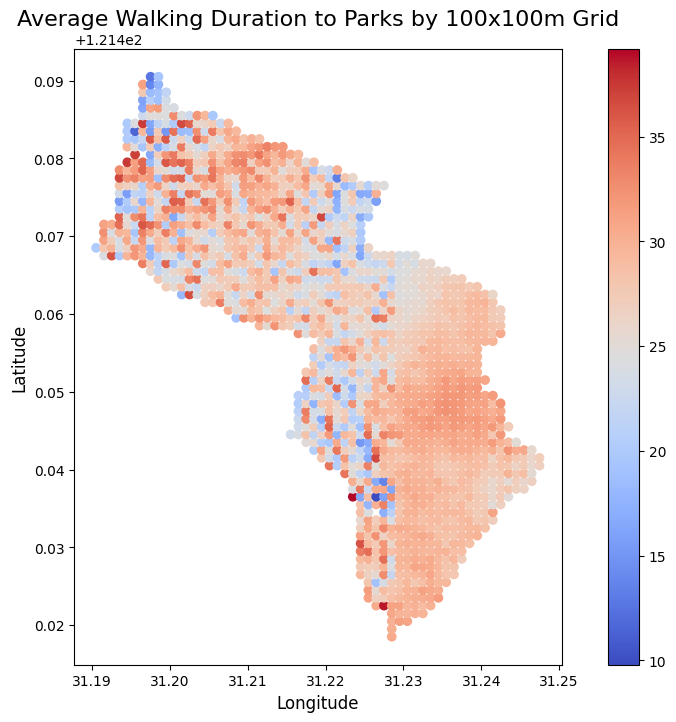

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import re

data = pd.read_csv("/content/drive/MyDrive/Capstone/data/OD_Time_Distance_Instruction/ALL_Valid_OD_Instructions")

# 提取经纬度的函数
def extract_coordinates(point_str):
    # 使用正则表达式提取坐标
    match = re.search(r"POINT \(([-\d.]+) ([-\d.]+)\)", point_str)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)  # 注意：返回纬度和经度（lat, lon）
    else:
        raise ValueError(f"Invalid POINT format: {point_str}")

# 生成100x100米网格ID
def generate_grid_id(lat, lon, grid_size=0.001):  # 100m对应约0.001°的经纬度
    x = np.floor(lat / grid_size) * grid_size
    y = np.floor(lon / grid_size) * grid_size
    return f"{x},{y}"

# 提取经纬度并生成网格ID
data['lat_lon'] = data['origin_loc'].apply(lambda loc: extract_coordinates(loc))
data['grid_id'] = data['lat_lon'].apply(lambda coord: generate_grid_id(coord[0], coord[1]))

# 按网格ID计算加权平均步行时间
grid_avg_time = data.groupby('grid_id').apply(
    lambda group: np.average(group['walking_duration'], weights=group['population_weight'])
).reset_index(name='avg_walking_duration')

# 为每个网格生成中心点
def grid_to_center(grid_id):
    lat, lon = map(float, grid_id.split(','))
    return Point(lon + 0.0005, lat + 0.0005)

grid_avg_time['geometry'] = grid_avg_time['grid_id'].apply(grid_to_center)
gdf = gpd.GeoDataFrame(grid_avg_time, geometry='geometry')

# 可视化热力图
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(column='avg_walking_duration', cmap='coolwarm', legend=True, ax=ax)
ax.set_title("Average Walking Duration to Parks by 100x100m Grid", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)


In [ ]:
import pandas as pd
import numpy as np
import folium
from shapely.geometry import Point
import re



# 提取经纬度的函数
def extract_coordinates(point_str):
    # 使用正则表达式提取坐标
    match = re.search(r"POINT \(([-\d.]+) ([-\d.]+)\)", point_str)
    if match:
        lon, lat = match.groups()
        return float(lat), float(lon)  # 注意：返回纬度和经度（lat, lon）
    else:
        raise ValueError(f"Invalid POINT format: {point_str}")

# 为每个人口点计算到附近公园的平均时间
data['origin_lat_lon'] = data['origin_loc'].apply(lambda loc: extract_coordinates(loc))
data['destination_lat_lon'] = data['destination_loc'].apply(lambda loc: extract_coordinates(loc))

# 计算每个人口点到附近公园的加权平均时间
population_avg_time = data.groupby('origin_lat_lon').apply(
    lambda group: np.average(group['walking_duration'], weights=group['population_weight'])
).reset_index(name='avg_walking_duration')

# 为每个点生成几何数据
population_avg_time['lon'] = population_avg_time['origin_lat_lon'].apply(lambda x: x[0])
population_avg_time['lat'] = population_avg_time['origin_lat_lon'].apply(lambda x: x[1])

# 创建交互式地图
m = folium.Map(location=[population_avg_time['lat'].mean(), population_avg_time['lon'].mean()], zoom_start=13)

# 将每个人口点的平均时间添加到地图
for _, row in population_avg_time.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"Avg Walking Duration: {row['avg_walking_duration']:.2f} mins"
    ).add_to(m)

# 保存地图到HTML文件或直接显示
m.save("population_avg_time_map.html")
m


<ipython-input-27-326de48b3f48>:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  population_avg_time = data.groupby('origin_lat_lon').apply(


In [ ]:
population_avg_time.to_csv("/content/drive/MyDrive/Capstone/data/population_avg_time")
population_avg_time

,origin_lat_lon,avg_walking_duration,lon,lat
0,"(121.41853958980484, 31.228583379488988)",30.520455,121.418540,31.228583
1,"(121.41943790508894, 31.228583379488988)",30.164394,121.419438,31.228583
2,"(121.42033622037309, 31.228583379488988)",30.124074,121.420336,31.228583
3,"(121.42033622037309, 31.2294816947731)",31.323913,121.420336,31.229482
4,"(121.42033622037309, 31.230380010057225)",30.960870,121.420336,31.230380
...,...,...,...,...
2016,"(121.48950649725026, 31.198040659828923)",15.387500,121.489506,31.198041
2017,"(121.48950649725026, 31.198938975113034)",19.841667,121.489506,31.198939
2018,"(121.4904048125344, 31.197142344544798)",12.623333,121.490405,31.197142
2019,"(121.4904048125344, 31.198040659828923)",18.806667,121.490405,31.198041


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 加载数据
df = pd.read_csv("/content/drive/MyDrive/Capstone/data/population_avg_time")  # 替换为实际 CSV 文件路径

# 确保经纬度列正确
df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# 转换为 GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")  # 使用 WGS 84 地理坐标系

# 保存为 GeoJSON 文件
gdf.to_file("/content/drive/MyDrive/Capstone/data/population_avg_time.geojson", driver="GeoJSON")




In [ ]:
gdf

,Unnamed: 0,origin_lat_lon,avg_walking_duration,lat,lon,geometry
0,0,"(121.41853958980484, 31.228583379488988)",35.694118,121.418540,31.228583,POINT (31.22858 121.41854)
1,1,"(121.41943790508894, 31.228583379488988)",35.325000,121.419438,31.228583,POINT (31.22858 121.41944)
2,2,"(121.42033622037309, 31.228583379488988)",36.817172,121.420336,31.228583,POINT (31.22858 121.42034)
3,3,"(121.42033622037309, 31.2294816947731)",35.875000,121.420336,31.229482,POINT (31.22948 121.42034)
4,4,"(121.42033622037309, 31.230380010057225)",35.414216,121.420336,31.230380,POINT (31.23038 121.42034)
...,...,...,...,...,...,...
2021,2021,"(121.48950649725026, 31.198040659828923)",42.211905,121.489506,31.198041,POINT (31.19804 121.48951)
2022,2022,"(121.48950649725026, 31.198938975113034)",33.607143,121.489506,31.198939,POINT (31.19894 121.48951)
2023,2023,"(121.4904048125344, 31.197142344544798)",28.916667,121.490405,31.197142,POINT (31.19714 121.4904)
2024,2024,"(121.4904048125344, 31.198040659828923)",41.162500,121.490405,31.198041,POINT (31.19804 121.4904)


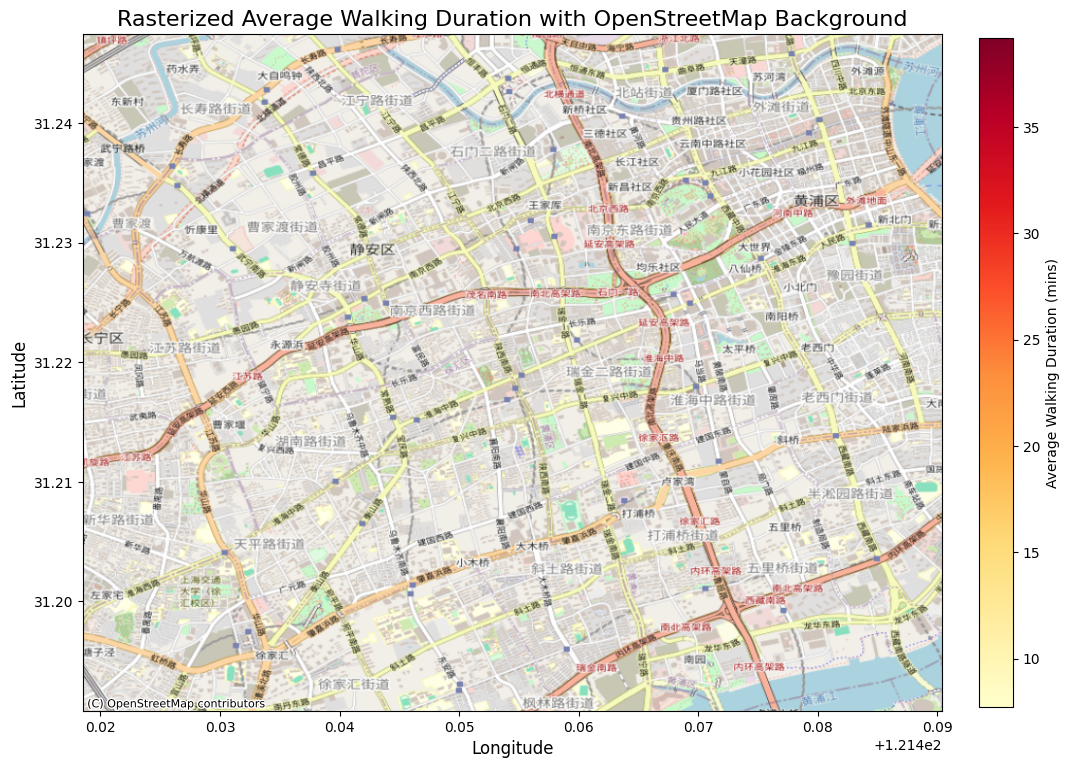

In [ ]:
import rasterio
import geopandas as gpd
from rasterio.features import rasterize
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx  # 用于加载 OpenStreetMap

# 加载点数据
gdf = gpd.read_file("/content/drive/MyDrive/Capstone/data/population_avg_time.geojson")

# 确保点数据中包含用于栅格化的字段和几何
if 'avg_walking_duration' not in gdf.columns or gdf.geometry.is_empty.any():
    raise ValueError("点数据缺少 'avg_walking_duration' 或几何信息为空")

# 定义栅格范围和分辨率
bounds = gdf.total_bounds  # xmin, ymin, xmax, ymax
resolution = 0.001  # 100米的分辨率

# 计算栅格宽度和高度
width = int((bounds[2] - bounds[0]) / resolution)  # 列数
height = int((bounds[3] - bounds[1]) / resolution)  # 行数

# 创建栅格变换
transform = rasterio.transform.from_origin(bounds[0], bounds[3], resolution, resolution)

# 栅格化点数据
shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf['avg_walking_duration']))
rasterized = rasterize(shapes, out_shape=(height, width), transform=transform, fill=-9999, dtype=np.float32)

# 将无数据值替换为 NaN（方便可视化）
rasterized[rasterized == -9999] = np.nan

# 可视化栅格数据
fig, ax = plt.subplots(figsize=(12, 10))

# 栅格图像
extent = (bounds[0], bounds[2], bounds[1], bounds[3])
raster_plot = ax.imshow(rasterized, extent=extent, cmap="YlOrRd", origin="upper")

# 添加颜色条
cbar = plt.colorbar(raster_plot, ax=ax, fraction=0.036, pad=0.04)
cbar.set_label("Average Walking Duration (mins)")

# 加入 OpenStreetMap 作为背景
gdf_proj = gdf.to_crs(epsg=4326)  # 转换为 Web Mercator 投影
ctx.add_basemap(ax, crs=gdf_proj.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)


# 设置标题和标签
ax.set_title("Rasterized Average Walking Duration with OpenStreetMap Background", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

plt.show()

# # 保存栅格为 GeoTIFF 文件
# output_raster_path = "/content/drive/MyDrive/Capstone/data/output_population_avg_time.tif"
# with rasterio.open(
#     output_raster_path,
#     "w",
#     driver="GTiff",
#     height=height,
#     width=width,
#     count=1,
#     dtype=rasterized.dtype,
#     crs="EPSG:4326",
#     transform=transform,
# ) as dst:
#     dst.write(rasterized, 1)

# print(f"栅格文件已保存到: {output_raster_path}")


In [ ]:
# 提取不重复的 destination_id
unique_destinations = merged_df_cleaned['destination_id'].dropna().unique()

# 将不重复的元素生成新的 DataFrame
new_df = pd.DataFrame(unique_destinations, columns=['destination_id'])

# 查看新 DataFrame
new_df


,destination_id
0,8103
1,15321
2,32
3,56
4,57
...,...
119,222
120,9072
121,3774
122,7979


In [ ]:
park = gpd.read_file("/content/drive/MyDrive/Capstone/Shanghai_CITY_PARK.geojson")
park

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,geometry
0,56,39763744,7202,park,人民公园,0.013504,9.854620e-06,"MULTIPOLYGON (((121.47083 31.23446, 121.47125 ..."
1,57,39961770,7202,park,复兴公园,0.011324,6.920550e-06,"MULTIPOLYGON (((121.46457 31.22042, 121.46464 ..."
2,129,50258395,7202,park,大观园绿地,0.004629,9.350000e-07,"MULTIPOLYGON (((121.46866 31.23965, 121.46744 ..."
3,246,58413664,7202,park,None,0.004009,4.514200e-07,"MULTIPOLYGON (((121.47952 31.19812, 121.47822 ..."
4,247,58413720,7202,park,None,0.005192,9.922400e-07,"MULTIPOLYGON (((121.48059 31.19819, 121.48047 ..."
...,...,...,...,...,...,...,...,...
442,9374,870546906,7202,park,None,0.003493,5.378900e-07,"MULTIPOLYGON (((121.45515 31.1332, 121.45508 3..."
443,9378,870546911,7202,park,None,0.009129,3.280150e-06,"MULTIPOLYGON (((121.45529 31.11205, 121.4553 3..."
444,9886,886526878,7202,park,None,0.011583,1.330440e-06,"MULTIPOLYGON (((121.43203 31.13155, 121.43337 ..."
445,9887,886526879,7202,park,None,0.022343,5.065840e-06,"MULTIPOLYGON (((121.44593 31.13113, 121.43989 ..."


In [ ]:
filtered_park_df = park[park['OBJECTID'].isin(new_df['destination_id'])]
filtered_park_df

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,geometry
0,56,39763744,7202,park,人民公园,0.013504,9.854620e-06,"MULTIPOLYGON (((121.47083 31.23446, 121.47125 ..."
1,57,39961770,7202,park,复兴公园,0.011324,6.920550e-06,"MULTIPOLYGON (((121.46457 31.22042, 121.46464 ..."
2,129,50258395,7202,park,大观园绿地,0.004629,9.350000e-07,"MULTIPOLYGON (((121.46866 31.23965, 121.46744 ..."
3,246,58413664,7202,park,None,0.004009,4.514200e-07,"MULTIPOLYGON (((121.47952 31.19812, 121.47822 ..."
4,247,58413720,7202,park,None,0.005192,9.922400e-07,"MULTIPOLYGON (((121.48059 31.19819, 121.48047 ..."
...,...,...,...,...,...,...,...,...
422,5513,477138725,7202,park,None,0.001543,1.101900e-07,"MULTIPOLYGON (((121.44744 31.21099, 121.44719 ..."
423,5514,477138726,7202,park,None,0.001404,1.157900e-07,"MULTIPOLYGON (((121.44357 31.21067, 121.44327 ..."
432,6469,571607270,7202,park,None,0.002431,2.940200e-07,"MULTIPOLYGON (((121.44621 31.19872, 121.4466 3..."
440,9370,870546902,7202,park,None,0.008064,1.239510e-06,"MULTIPOLYGON (((121.45771 31.17676, 121.45772 ..."


In [ ]:
filtered_park_df.to_file('/content/drive/MyDrive/Capstone/filtered_park_df.geojson', driver='GeoJSON')


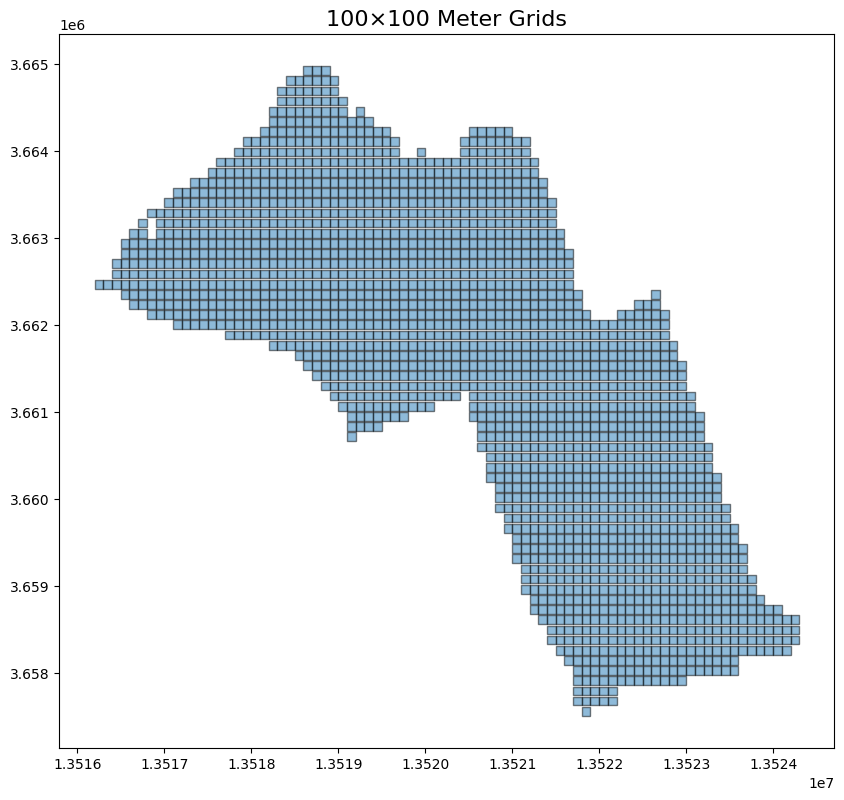

100×100 米网格化数据已保存至: /content/drive/MyDrive/Capstone/IMPORTANT_DATA/grid_100m.geojson


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

# 1. 读取地理数据文件
file_path = "/content/drive/MyDrive/Capstone/data/population data/filtered_elder_pop1106_index9%.shp"  # 替换为你的文件路径
gdf = gpd.read_file(file_path)

# 2. 确保数据有投影坐标系（基于米的 CRS）
if gdf.crs is None:
    raise ValueError("The dataset does not have a CRS defined. Please define a CRS.")
elif gdf.crs.is_geographic:  # 如果是经纬度坐标系
    print(f"Current CRS: {gdf.crs}. Transforming to EPSG:3857 (Web Mercator projection).")
    gdf = gdf.to_crs("EPSG:3857")  # 转换为基于米的投影坐标系

# 3. 定义 100×100 米方格生成函数
def create_grid(centroid, size=100):
    """
    Create a square grid (100x100 meters by default) centered at the given point.
    """
    x, y = centroid.x, centroid.y
    return box(x - size / 2, y - size / 2, x + size / 2, y + size / 2)

# 4. 计算每个几何的中心点并生成方格
gdf['grid'] = gdf['geometry'].centroid.apply(lambda centroid: create_grid(centroid, size=100))

# 5. 替换几何列为生成的网格
gdf = gdf.set_geometry('grid')
gdf = gdf.drop(columns=['geometry'], errors='ignore')


# 6. 绘制生成的网格
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', alpha=0.5)
ax.set_title("100×100 Meter Grids", fontsize=16)
plt.show()

# 7. 保存结果为新的 GeoJSON 文件或其他格式
output_file = "/content/drive/MyDrive/Capstone/IMPORTANT_DATA/grid_100m.geojson"  # 输出文件路径
gdf.to_file(output_file, driver="ESRI Shapefile")

# 8. 输出结果信息
print(f"100×100 米网格化数据已保存至: {output_file}")


In [ ]:
gdf

,id,population,elder_rati,grid
0,19642,80.844990,0.100967,"POLYGON ((13518700 3664876.845, 13518700 36649..."
1,19643,83.608226,0.100967,"POLYGON ((13518800 3664876.845, 13518800 36649..."
2,19644,69.003618,0.100967,"POLYGON ((13518900 3664876.845, 13518900 36649..."
3,19875,78.576787,0.100967,"POLYGON ((13518500 3664759.878, 13518500 36648..."
4,19876,76.828783,0.100967,"POLYGON ((13518600 3664759.878, 13518600 36648..."
...,...,...,...,...
2021,36377,64.789033,0.099534,"POLYGON ((13521900 3657626.968, 13521900 36577..."
2022,36378,60.187111,0.099534,"POLYGON ((13522000 3657626.968, 13522000 36577..."
2023,36379,58.169425,0.099534,"POLYGON ((13522100 3657626.968, 13522100 36577..."
2024,36380,68.189320,0.099534,"POLYGON ((13522200 3657626.968, 13522200 36577..."
